In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np

#导入数据集
breast = load_breast_cancer()
X = breast.data
y = breast.target
X_train,X_test,y_train,y_test =\
    train_test_split(X,y,test_size=0.2,random_state=1)

#流水线集成操作
pipe_lr = Pipeline([('scl',StandardScaler()),
                   ('pca',PCA(n_components=2)),
                   ('clf',LogisticRegression(solver='lbfgs',multi_class='auto'))])
pipe_lr.fit(X_train,y_train)
print ('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.947


# k折交叉验证
主要应用于评估一个模型的均值分及其上下限

In [2]:
#k折交叉验证
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10,random_state=1)
scores=[]
for k, (train,test) in enumerate(kfold.split(X_train, y_train)):
    pipe_lr.fit(X_train[train],y_train[train])
    score = pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)
print ('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.952 +/- 0.025


In [3]:
#K折交叉验证评分
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,y=y_train,cv=10,n_jobs=1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                     np.std(scores)))

CV accuracy: 0.952 +/- 0.025


# 学习曲线
主要应用于评估一个模型对数据量上升的性能提升曲线

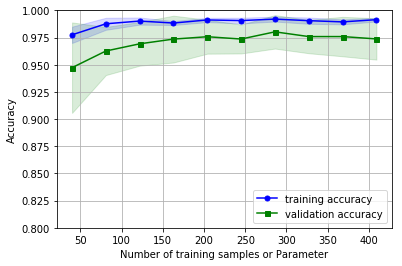

In [25]:
import matplotlib.pylab as plt
from sklearn.model_selection import learning_curve
pipe_lr = Pipeline([('scl',StandardScaler()),
                   ('clf',LogisticRegression(solver='lbfgs',multi_class='auto',\
                                             penalty='l2',random_state=0))])
train_sizes,train_scores,test_scores = \
    learning_curve(estimator=pipe_lr,
                  X=X_train,
                  y=y_train,
                  train_sizes=np.linspace(0.1,1.0,10),#控制用于生成学习曲线的样本数量百分比
                  cv=10,
                  n_jobs=1)
def cvCurve(train_sizes,train_scores,test_scores):
    train_mean = np.mean(train_scores,axis=1)
    train_std = np.std(train_scores,axis=1)
    test_mean = np.mean(test_scores,axis=1)
    test_std = np.std(test_scores,axis=1)
    plt.plot(train_sizes,train_mean,
            color='blue',marker='o',
            markersize=5,#标记尺寸
            label='training accuracy')
    plt.fill_between(train_sizes,
                    train_mean + train_std,
                    train_mean - train_std,
                    alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,
            color='green',marker='s',
            markersize=5,#折线点大小
            label='validation accuracy')
    plt.fill_between(train_sizes,
                    test_mean + test_std,
                    test_mean - test_std,
                    alpha=0.15,color='green')
    plt.grid()#配置网格线
    plt.xlabel('Number of training samples or Parameter')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.8,1.0])#设置Y轴的上下限
cvCurve(train_sizes,train_scores,test_scores)
plt.show()

# 验证曲线
主要应用于判断一个模型是否过拟合或欠拟合

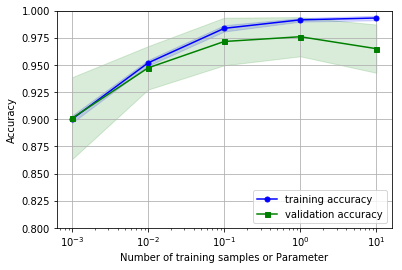

In [29]:
from sklearn.model_selection import validation_curve
param_range=[0.001,0.01,0.1,1.0,10.0]
train_scores,test_scores =validation_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    param_name='clf__C',
    param_range=param_range,
    cv=10)
cvCurve(param_range,train_scores,test_scores)
plt.xscale('log')
plt.show()